In [1]:
import pandas as pd

In [2]:
d0=pd.read_csv("train.csv")

In [3]:
d0.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
d0.shape

(42000, 785)

In [5]:
df=d0.drop("label",axis=1)

In [6]:
d0.shape

(42000, 785)

In [7]:
l=d0["label"]

In [8]:
l.shape

(42000,)

In [9]:
#after droping the label column:

In [10]:
df.shape

(42000, 784)

In [11]:
df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [12]:
#taking some of the data to train:
data=df.head(20000)
label=l.head(20000)

In [13]:
print(data.shape)
print(label.shape)

(20000, 784)
(20000,)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 119.6 MB


In [15]:
label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: label
Non-Null Count  Dtype
--------------  -----
20000 non-null  int64
dtypes: int64(1)
memory usage: 156.4 KB


In [16]:
#visualizartion technique:
#importing the matplot lib and to pyplot:
import matplotlib.pyplot as plt

In [17]:
#we have to take sample data from the bunch of data to reprasention and an tooo analysing:
#and this the data that we have to work for now to train and and to analyze the result:
data.shape

(20000, 784)

# applying the PCA

In [18]:
#we take the sample data 20K fro our analysis: 

In [19]:
#data preprocessing - STANDERDISE the data :
#importing the preprocessing.stdScaler class from the sklearn laibrary:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data)

In [20]:
#here we will chekc the shape o fthe standerdized data:
std_data.shape

(20000, 784)

In [21]:
#now we will compute the co-variance matrix on the std_data:

import numpy as np

co_data=np.matmul(std_data.T,std_data)


#here the data is tranposes and computing the covariamnce to the original data:
#from this we canget the samples for our result:


In [22]:
co_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
co_data.shape

(784, 784)

In [24]:
#from the co_data we can do cumpute on the eigan values and the eigan vectors:
from scipy.linalg import eigh
value,vector=eigh(co_data,eigvals=(782,783))

In [25]:
value

array([581382.27258531, 801125.51413557])

In [26]:
vector

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [27]:
vector=vector.T
#transpose the matrix(vector):

In [28]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
vector.shape

(2, 784)

In [30]:
vector[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -6.15249962e-04, -6.15249962e-04,  5.55111512e-17, -4.44089210e-16,
       -5.55111512e-17, -3.33066907e-16,  2.22044605e-16, -3.88578059e-16,
       -3.33066907e-16,  1.66533454e-16,  2.77555756e-17,  3.46944695e-18,
       -8.67361738e-19,  2.16840434e-19,  0.00000000e+00, -6.77626358e-21,
        0.00000000e+00,  0.00000000e+00,  2.64697796e-23, -6.61744490e-24,
        0.00000000e+00, -1.03397577e-25, -1.91955760e-03, -2.99767822e-03,
       -5.03706105e-03, -5.28779177e-03, -4.66155023e-03, -4.71765308e-03,
       -3.61087525e-03, -2.25152154e-03, -1.90405735e-03, -5.82346326e-04,
        7.82928817e-04,  1.94627578e-03,  2.62620424e-03,  2.63941016e-03,
        2.04268225e-03,  2.12183474e-03,  2.12669824e-03,  2.80259693e-45,
       -1.75162308e-46, -

In [31]:
vector[1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.77505975e-04,  1.77505975e-04, -5.55111512e-17,  6.10622664e-16,
        2.22044605e-16, -1.11022302e-16,  5.55111512e-17, -2.77555756e-17,
       -6.93889390e-18,  1.73472348e-18,  2.16840434e-19,  5.42101086e-20,
       -3.38813179e-21,  8.47032947e-22,  0.00000000e+00, -1.32348898e-23,
        0.00000000e+00,  0.00000000e+00,  6.46234854e-27, -8.07793567e-28,
        0.00000000e+00, -2.52435490e-29, -9.42524031e-04, -1.81245995e-03,
       -3.26403344e-03, -4.16811052e-03, -4.42579887e-03, -4.73469989e-03,
       -4.19901121e-03, -3.23822180e-03, -3.25257085e-03, -1.81099133e-03,
       -7.39498080e-04,  7.74260794e-05, -1.75372552e-04, -1.68946786e-04,
       -1.40948241e-05, -1.46094245e-03, -1.76641321e-03, -1.44997486e-49,
       -3.44953695e-50, -

In [32]:
vector.dtype

dtype('float64')

In [33]:
new_cord=np.matmul(vector,std_data.T)
#here the eigan vector will computed with ethe std_data:

new_cord.shape

(2, 20000)

In [34]:
new_cord

array([[  5.43069721,  -6.24299872,   1.82861099, ...,   5.46973995,
        -16.30829738, -10.74668112],
       [  5.06086205, -19.29314824,   7.68449823, ...,   0.08480173,
         -2.96182323,   5.19074485]])

In [35]:
print(new_cord.T)
new_coordinates = np.vstack((new_coordinates, labels)).T


[[  5.43069721   5.06086205]
 [ -6.24299872 -19.29314824]
 [  1.82861099   7.68449823]
 ...
 [  5.46973995   0.08480173]
 [-16.30829738  -2.96182323]
 [-10.74668112   5.19074485]]


In [40]:
new_cord2=np.vstack((new_cord,label)).T

In [41]:
new_cord2

array([[  5.43069721,   5.06086205,   1.        ],
       [ -6.24299872, -19.29314824,   0.        ],
       [  1.82861099,   7.68449823,   1.        ],
       ...,
       [  5.46973995,   0.08480173,   6.        ],
       [-16.30829738,  -2.96182323,   8.        ],
       [-10.74668112,   5.19074485,   7.        ]])

In [42]:
new_cord2.shape

(20000, 3)

In [ ]:
#creating new data frame for our good reference:
df=pd.DataFrame(new_cord2,columns=('1st principle','2nd principle','label'))

array('1st principle', dtype='<U13')

In [45]:
df.head(50)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0        0       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       0       0       0       0   
2        0       0       0       0       0       0       0       0       0   
3        0       0       0       0       0       0       0       0       0   
4        0       0       0       0       0       0       0       0       0   
5        0       0       0       0       0       0       0       0       0   
6        0       0       0       0       0       0       0       0       0   
7        0       0       0       0       0       0       0       0       0   
8        0       0       0       0       0       0       0       0       0   
9        0       0       0       0       0       0       0       0       0   
10       0       0       0       0       0       0       0       0       0   
11       0       0       0       0       0       0       0       0       0   
12       0       0       0       0       0       0       0       0       0   
13       0       0       0       0       0       0       0       0       0   
14       0       0       0       0       0       0       0       0       0   
15       0       0       0       0       0       0       0       0       0   
16       0       0       0       0       0       0       0       0       0   
17       0       0       0       0       0       0       0       0       0   
18       0       0       0       0       0       0       0       0       0   
19       0       0       0       0       0       0       0       0       0   
20       0       0       0       0       0       0       0       0       0   
21       0       0       0       0       0       0       0       0       0   
22       0       0       0       0       0       0       0       0       0   
23       0       0       0       0       0       0       0       0       0   
24       0       0       0       0       0       0       0       0       0   
25       0       0       0       0       0       0       0       0       0   
26       0       0       0       0       0       0       0       0       0   
27       0       0       0       0       0       0       0       0       0   
28       0       0       0       0       0       0       0       0       0   
29       0       0       0       0       0       0       0       0       0   
30       0       0       0       0       0       0       0       0       0   
31       0       0       0       0       0       0       0       0       0   
32       0       0       0       0       0       0       0       0       0   
33       0       0       0       0       0       0       0       0       0   
34       0       0       0       0       0       0       0       0       0   
35       0       0       0       0       0       0       0       0       0   
36       0       0       0       0       0       0       0       0       0   
37       0       0       0       0       0       0       0       0       0   
38       0       0       0       0       0       0       0       0       0   
39       0       0       0       0       0       0       0       0       0   
40       0       0       0       0       0       0       0       0       0   
41       0       0       0       0       0       0       0       0       0   
42       0       0       0       0       0       0       0       0       0   
43       0       0       0       0       0       0       0       0       0   
44       0       0       0       0       0       0       0       0       0   
45       0       0       0       0       0       0       0       0       0   
46       0       0       0       0       0       0       0       0       0   
47       0       0       0       0       0       0       0       0       0   
48       0       0       0       0       0       0       0       0       0   
49       0       0       0       0       0       0       0       0       0   

    pixel9  ...  pixel774

In [56]:
import seaborn as sn

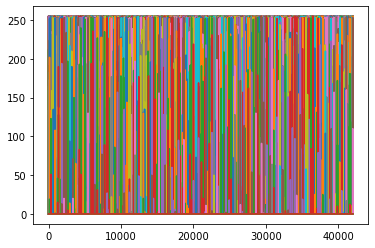

In [53]:
plt.plot(df)
plt.show()

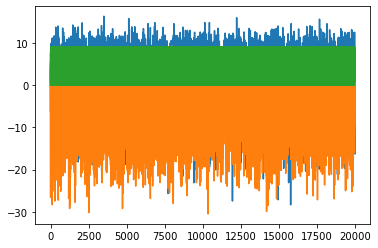

In [54]:
plt.plot(new_cord2)
plt.show()

In [59]:
sn.scatterplot("1st principle","2nd principle",legend="full",hue="label",data=df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `1st principle` for parameter `x`

In [67]:
#incitialiting the pca:
from sklearn import decomposition
pca=decomposition.PCA()
pca

PCA()

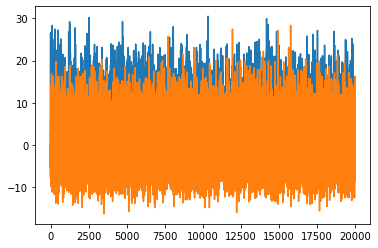

In [73]:
pca.n_components=2
pca_data=pca.fit_transform(std_data)
plt.plot(pca_data)
plt.show()

In [74]:
pca_data.shape

(20000, 2)

In [79]:
pca_data2=np.vstack((pca_data.T,label)).T

In [81]:
pca_data2

array([[-5.06088033, -5.43072442,  1.        ,  1.        ],
       [19.29311167,  6.24344421,  0.        ,  0.        ],
       [-7.68449363, -1.82832579,  1.        ,  1.        ],
       ...,
       [-0.08484574, -5.46956027,  6.        ,  6.        ],
       [ 2.96175295, 16.30891386,  8.        ,  8.        ],
       [-5.19080478, 10.74615999,  7.        ,  7.        ]])

In [82]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st principal", "2nd principal", "label"))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


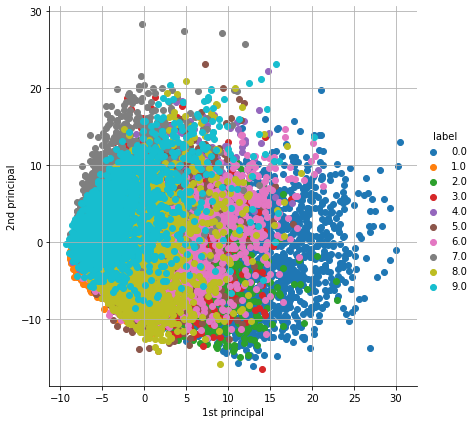

In [84]:
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st principal', '2nd principal').add_legend()
plt.grid()
plt.show()


# t-SNE

In [89]:
from sklearn.manifold import TSNE

In [118]:
data_1000 = std_data[0:1000,:]
label_1000 = label[0:1000]

In [96]:
data_1000

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
label_1000

0      1
1      0
2      1
3      4
4      0
      ..
995    2
996    5
997    9
998    6
999    4
Name: label, Length: 1000, dtype: int64

In [120]:
model = TSNE(n_components=2, random_state=0)
model

TSNE(random_state=0)

In [121]:
tsne_data = model.fit_transform(data_1000)
tsne_data

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  8.527079 ,  23.172731 ],
       [-30.978794 , -20.935091 ],
       [ 20.953648 ,  10.85715  ],
       ...,
       [ 20.858547 , -24.118708 ],
       [-43.725403 ,  -2.9502473],
       [ 14.099981 ,  -8.939094 ]], dtype=float32)

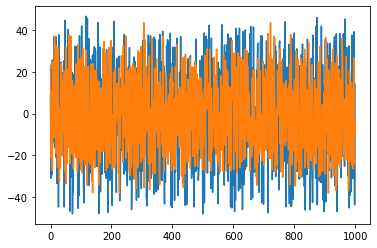

In [112]:
plt.plot(tsne_data)

In [122]:
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_data.shape

(1000, 3)

In [124]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

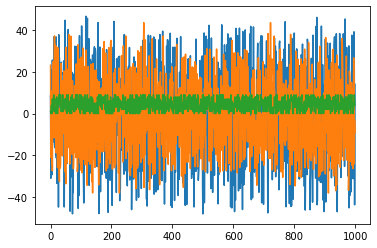

In [125]:
plt.plot(tsne_df)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


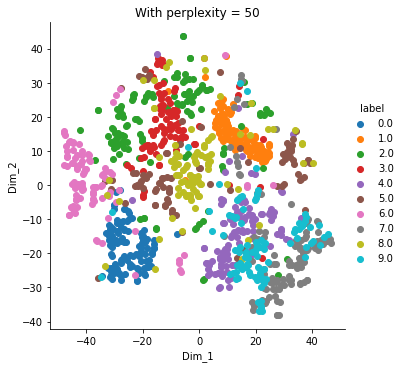

In [128]:
sn.FacetGrid(tsne_df, hue="label", size=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


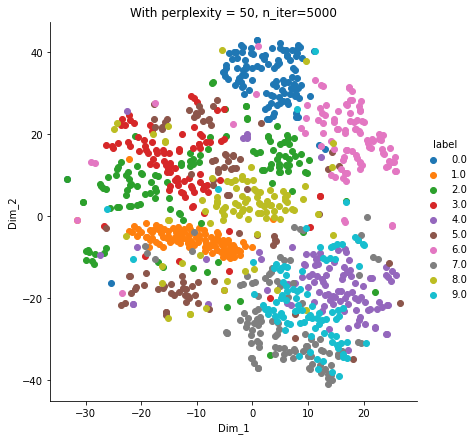

In [134]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()
